# Analisis Sentimen Ulasan Aplikasi Shopee di google play store Menggunakan Metode TextBlob


# scraping data

In [ ]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

# Impor paket yang diperlukan

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=1000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fc79a1d6-2198-4697-aea1-bb1b36c63d8c,Ex7offcial Ruthless,https://play-lh.googleusercontent.com/a/ACg8oc...,Makin kesini makin kesana nih aplikasi orange ...,1,175,3.36.20,2024-10-30 22:56:16,"Hi kak, maaf udah buat kakak ga nyaman terkait...",2024-10-30 23:19:15,3.36.20
1,5e265068-3adf-413b-a176-731295ef3fa9,Darmani Dongkol,https://play-lh.googleusercontent.com/a/ACg8oc...,Setelah saya menggunakan aplikasi terbaru shop...,1,61,3.36.20,2024-10-31 13:19:43,"Hai kak, maaf banget ya udah buat ga nyaman. T...",2024-10-31 14:41:44,3.36.20
2,fbf77ab7-32c7-45d3-aa57-6bd04bc5ac2c,Yusup,https://play-lh.googleusercontent.com/a/ACg8oc...,"Shopinya bagus,tapi pelayanan kurir nya yg tdk...",5,612,3.36.20,2024-10-31 16:06:05,"Haii kak, maaf sudah bikin tidak nyaman terkai...",2024-10-31 17:23:13,3.36.20
3,1481fc01-c23f-494f-8713-fb0a28f15600,M repky erlangga Erlangga,https://play-lh.googleusercontent.com/a/ACg8oc...,"Lumayan apk nya, bagus liat penilaiannya dan b...",5,244,3.36.20,2024-11-01 02:37:45,"Yuhuu mantulll, aku ikut seneng kalau kamu pua...",2024-11-01 03:09:46,3.36.20
4,c671bd82-35d7-471b-8dfb-f4c13394b27b,Silvi ana,https://play-lh.googleusercontent.com/a-/ALV-U...,Saya suka dengan aplikasi shope Bisa belanja d...,5,27,3.36.19,2024-10-31 10:27:41,"hi kak, makasih buat review bintang 5 nya, yuk...",2024-10-31 11:22:23,3.36.19


In [ ]:
len(df_busu.index) #kemudian hitung kembali berapa jumlah data yg didapatkan

1000

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()  #dari scrapping tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,Ex7offcial Ruthless,1,2024-10-30 22:56:16,Makin kesini makin kesana nih aplikasi orange ...
1,Darmani Dongkol,1,2024-10-31 13:19:43,Setelah saya menggunakan aplikasi terbaru shop...
2,Yusup,5,2024-10-31 16:06:05,"Shopinya bagus,tapi pelayanan kurir nya yg tdk..."
3,M repky erlangga Erlangga,5,2024-11-01 02:37:45,"Lumayan apk nya, bagus liat penilaiannya dan b..."
4,Silvi ana,5,2024-10-31 10:27:41,Saya suka dengan aplikasi shope Bisa belanja d...


In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
239,Dewi Mey,5,2024-11-02 11:46:25,Aplikasi belanja online terbaik. yang ku temuk...
91,MUHAMMAD RIZQY,5,2024-11-01 16:54:34,"Belanja di shopie memang murah serta hemat,tap..."
11,Jaka Hermawan,1,2024-11-01 16:44:18,Males belanja di shopee ada 3-4 x biaya tambah...
286,Edi windy,2,2024-11-01 16:35:00,"Shope payah. Apa gunanya member gold dari dlu,..."
113,Laela Laela,5,2024-11-01 15:23:46,"Apk nyaa baguss sangat membantu banget, tapi k..."


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian kita simpan ke variabel my_df

In [ ]:
my_df=my_df[['content', 'score']]#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.


In [ ]:
my_df.head()

,content,score
239,Aplikasi belanja online terbaik. yang ku temuk...,5
91,"Belanja di shopie memang murah serta hemat,tap...",5
11,Males belanja di shopee ada 3-4 x biaya tambah...,1
286,"Shope payah. Apa gunanya member gold dari dlu,...",2
113,"Apk nyaa baguss sangat membantu banget, tapi k...",5


# PELABELAN

In [ ]:
def pelabelan(score):
  if score < 2:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(1000)

<ipython-input-62-fc5c6d81ee9f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
239,Aplikasi belanja online terbaik. yang ku temuk...,5,Positif
91,"Belanja di shopie memang murah serta hemat,tap...",5,Positif
11,Males belanja di shopee ada 3-4 x biaya tambah...,1,Negatif
286,"Shope payah. Apa gunanya member gold dari dlu,...",2,None
113,"Apk nyaa baguss sangat membantu banget, tapi k...",5,Positif
...,...,...,...
153,"Perbaiki aplikasimu segera dong, kalo ga mau p...",1,Negatif
405,kenapa shopee sekarang sangat mengecewakan? ha...,1,Negatif
408,"Gak jelas pembaharuan yang belum lama ini, bik...",1,Negatif
501,Biasanya check out di shopee bisa pilih semua ...,1,Negatif


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)  #kemudian save menjadi file csv

# pembersihan data
# data cleaning

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(1000)

,content,score,Label
0,Aplikasi belanja online terbaik. yang ku temuk...,5,Positif
1,"Belanja di shopie memang murah serta hemat,tap...",5,Positif
2,Males belanja di shopee ada 3-4 x biaya tambah...,1,Negatif
3,"Shope payah. Apa gunanya member gold dari dlu,...",2,NaN
4,"Apk nyaa baguss sangat membantu banget, tapi k...",5,Positif
...,...,...,...
995,"Perbaiki aplikasimu segera dong, kalo ga mau p...",1,Negatif
996,kenapa shopee sekarang sangat mengecewakan? ha...,1,Negatif
997,"Gak jelas pembaharuan yang belum lama ini, bik...",1,Negatif
998,Biasanya check out di shopee bisa pilih semua ...,1,Negatif


In [ ]:
my_df.to_csv("shopeepreprocessing.csv", index = False)  #simpan hasil file data cleaning dengan nama shopeepreprocessing.csv

# Text PreProcessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/shopeepreprocessing.csv')
df.head(50)

,content,score,Label
0,Aplikasi belanja online terbaik. yang ku temuk...,5,Positif
1,"Belanja di shopie memang murah serta hemat,tap...",5,Positif
2,Males belanja di shopee ada 3-4 x biaya tambah...,1,Negatif
3,"Shope payah. Apa gunanya member gold dari dlu,...",2,NaN
4,"Apk nyaa baguss sangat membantu banget, tapi k...",5,Positif
5,Terimakasih atas penjelasannya dan fast respon...,5,Positif
6,suka belanja di shopee sama main game di shope...,3,NaN
7,Saya merasa kecewa Karena saya udah beberapa k...,1,Negatif
8,Mudah dlm browsing. responsif. variatif dlm pe...,5,Positif
9,Di keterangan ada pengembalian dana untuk pemb...,1,Negatif


# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)


,content,score,Label,text_clean
0,Aplikasi belanja online terbaik. yang ku temuk...,5,Positif,aplikasi belanja online terbaik yang ku temuka...
1,"Belanja di shopie memang murah serta hemat,tap...",5,Positif,belanja di shopie memang murah serta hemattapi...
2,Males belanja di shopee ada 3-4 x biaya tambah...,1,Negatif,males belanja di shopee ada x biaya tambahan ...
3,"Shope payah. Apa gunanya member gold dari dlu,...",2,NaN,shope payah apa gunanya member gold dari dlu l...
4,"Apk nyaa baguss sangat membantu banget, tapi k...",5,Positif,apk nyaa baguss sangat membantu banget tapi ke...
5,Terimakasih atas penjelasannya dan fast respon...,5,Positif,terimakasih atas penjelasannya dan fast respon...
6,suka belanja di shopee sama main game di shope...,3,NaN,suka belanja di shopee sama main game di shope...
7,Saya merasa kecewa Karena saya udah beberapa k...,1,Negatif,saya merasa kecewa karena saya udah beberapa k...
8,Mudah dlm browsing. responsif. variatif dlm pe...,5,Positif,mudah dlm browsing responsif variatif dlm penc...
9,Di keterangan ada pengembalian dana untuk pemb...,1,Negatif,di keterangan ada pengembalian dana untuk pemb...


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,Aplikasi belanja online terbaik. yang ku temuk...,5,Positif,aplikasi belanja online terbaik yang ku temuka...,aplikasi belanja online terbaik ku temukan ter...
1,"Belanja di shopie memang murah serta hemat,tap...",5,Positif,belanja di shopie memang murah serta hemattapi...,belanja shopie murah hemattapi toko yg nakal s...
2,Males belanja di shopee ada 3-4 x biaya tambah...,1,Negatif,males belanja di shopee ada x biaya tambahan ...,males belanja shopee x biaya tambahan biaya pe...
3,"Shope payah. Apa gunanya member gold dari dlu,...",2,NaN,shope payah apa gunanya member gold dari dlu l...,shope payah gunanya member gold dlu limit spay...
4,"Apk nyaa baguss sangat membantu banget, tapi k...",5,Positif,apk nyaa baguss sangat membantu banget tapi ke...,apk nyaa baguss membantu banget yaa kak kendal...
5,Terimakasih atas penjelasannya dan fast respon...,5,Positif,terimakasih atas penjelasannya dan fast respon...,terimakasih penjelasannya fast responnya saran...
6,suka belanja di shopee sama main game di shope...,3,NaN,suka belanja di shopee sama main game di shope...,suka belanja shopee main game shopee shopee ce...
7,Saya merasa kecewa Karena saya udah beberapa k...,1,Negatif,saya merasa kecewa karena saya udah beberapa k...,kecewa udah kali beli barang yg hikmah nya doa...
8,Mudah dlm browsing. responsif. variatif dlm pe...,5,Positif,mudah dlm browsing responsif variatif dlm penc...,mudah dlm browsing responsif variatif dlm penc...
9,Di keterangan ada pengembalian dana untuk pemb...,1,Negatif,di keterangan ada pengembalian dana untuk pemb...,keterangan pengembalian dana pembelian token p...


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,Aplikasi belanja online terbaik. yang ku temuk...,5,Positif,aplikasi belanja online terbaik yang ku temuka...,aplikasi belanja online terbaik ku temukan ter...,"[aplikasi, belanja, online, terbaik, ku, temuk..."
1,"Belanja di shopie memang murah serta hemat,tap...",5,Positif,belanja di shopie memang murah serta hemattapi...,belanja shopie murah hemattapi toko yg nakal s...,"[belanja, shopie, murah, hemattapi, toko, yg, ..."
2,Males belanja di shopee ada 3-4 x biaya tambah...,1,Negatif,males belanja di shopee ada x biaya tambahan ...,males belanja shopee x biaya tambahan biaya pe...,"[males, belanja, shopee, x, biaya, tambahan, b..."
3,"Shope payah. Apa gunanya member gold dari dlu,...",2,NaN,shope payah apa gunanya member gold dari dlu l...,shope payah gunanya member gold dlu limit spay...,"[shope, payah, gunanya, member, gold, dlu, lim..."
4,"Apk nyaa baguss sangat membantu banget, tapi k...",5,Positif,apk nyaa baguss sangat membantu banget tapi ke...,apk nyaa baguss membantu banget yaa kak kendal...,"[apk, nyaa, baguss, membantu, banget, yaa, kak..."


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

Streaming output truncated to the last 5000 lines.
166 : semoga : moga
167 : bunga : bunga
168 : cicilannya : cicil
169 : sy : sy
170 : pelanggan : langgan
171 : puluhan : puluh
172 : juta : juta
173 : pesanan : pesan
174 : tdk : tdk
175 : ditempat : tempat
176 : diblokir : blokir
177 : berhenti : henti
178 : krn : krn
179 : mempertimbangkan : timbang
180 : pembelanjaan : belanja
181 : ditangguhkan : tangguh
182 : seller : seller
183 : diuntungkan : untung
184 : pembeli : beli
185 : refund : refund
186 : an : an
187 : acc : acc
188 : retur : retur
189 : jd : jd
190 : dikembalikan : kembali
191 : diretur : retur
192 : duh : duh
193 : enaknya : enak
194 : lgpercuma : lgpercuma
195 : mengajukan : aju
196 : banding : banding
197 : ditolak : tolak
198 : karna : karna
199 : chat : chat
200 : cs : cs
201 : berdasarkan : dasar
202 : dispute : dispute
203 : dr : dr
204 : bukti : bukti
205 : dikirim : kirim
206 : palsu : palsu
207 : ya : ya
208 : iya : iya
209 : in : in
210 : wkwkada : wkwkada
2

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Aplikasi belanja online terbaik. yang ku temuk...,5,Positif,aplikasi belanja online terbaik yang ku temuka...,aplikasi belanja online terbaik ku temukan ter...,"[aplikasi, belanja, online, terbaik, ku, temuk...",aplikasi belanja online baik ku temu terimakas...
1,"Belanja di shopie memang murah serta hemat,tap...",5,Positif,belanja di shopie memang murah serta hemattapi...,belanja shopie murah hemattapi toko yg nakal s...,"[belanja, shopie, murah, hemattapi, toko, yg, ...",belanja shopie murah hemattapi toko yg nakal s...
2,Males belanja di shopee ada 3-4 x biaya tambah...,1,Negatif,males belanja di shopee ada x biaya tambahan ...,males belanja shopee x biaya tambahan biaya pe...,"[males, belanja, shopee, x, biaya, tambahan, b...",males belanja shopee x biaya tambah biaya tang...
3,"Shope payah. Apa gunanya member gold dari dlu,...",2,NaN,shope payah apa gunanya member gold dari dlu l...,shope payah gunanya member gold dlu limit spay...,"[shope, payah, gunanya, member, gold, dlu, lim...",shope payah guna member gold dlu limit spaylat...
4,"Apk nyaa baguss sangat membantu banget, tapi k...",5,Positif,apk nyaa baguss sangat membantu banget tapi ke...,apk nyaa baguss membantu banget yaa kak kendal...,"[apk, nyaa, baguss, membantu, banget, yaa, kak...",apk nyaa baguss bantu banget yaa kak kendala p...
5,Terimakasih atas penjelasannya dan fast respon...,5,Positif,terimakasih atas penjelasannya dan fast respon...,terimakasih penjelasannya fast responnya saran...,"[terimakasih, penjelasannya, fast, responnya, ...",terimakasih jelas fast responnya saran metode ...
6,suka belanja di shopee sama main game di shope...,3,NaN,suka belanja di shopee sama main game di shope...,suka belanja shopee main game shopee shopee ce...,"[suka, belanja, shopee, main, game, shopee, sh...",suka belanja shopee main game shopee shopee ce...
7,Saya merasa kecewa Karena saya udah beberapa k...,1,Negatif,saya merasa kecewa karena saya udah beberapa k...,kecewa udah kali beli barang yg hikmah nya doa...,"[kecewa, udah, kali, beli, barang, yg, hikmah,...",kecewa udah kali beli barang yg hikmah nya doa...
8,Mudah dlm browsing. responsif. variatif dlm pe...,5,Positif,mudah dlm browsing responsif variatif dlm penc...,mudah dlm browsing responsif variatif dlm penc...,"[mudah, dlm, browsing, responsif, variatif, dl...",mudah dlm browsing responsif variatif dlm cari...
9,Di keterangan ada pengembalian dana untuk pemb...,1,Negatif,di keterangan ada pengembalian dana untuk pemb...,keterangan pengembalian dana pembelian token p...,"[keterangan, pengembalian, dana, pembelian, to...",terang kembali dana beli token pulsa dll aktua...


In [ ]:
data_clean.to_csv('hasil_TextPreProcessing_shopee.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [ ]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [ ]:
# prompt: buatkan saya kode analisis textblobnya

from textblob import TextBlob
import pandas as pd

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_shopee.csv')

# Function to perform sentiment analysis using TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'text_steamindo' column
data_clean['textblob_polarity'] = data_clean['text_steamindo'].apply(get_textblob_sentiment)

# Function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity < 0:
        return 'Negatif'
    elif polarity == 0:
        return 'Netral'
    else:
        return 'Positif'

# Apply the classification function
data_clean['textblob_sentiment'] = data_clean['textblob_polarity'].apply(classify_sentiment)

# Print the updated DataFrame with TextBlob sentiment analysis results
print(data_clean[['text_steamindo', 'textblob_polarity', 'textblob_sentiment']])

# You can further analyze the 'textblob_sentiment' column, for example:
# Calculate the number of positive, negative, and neutral sentiments
sentiment_counts = data_clean['textblob_sentiment'].value_counts()
print("\nSentiment Counts:")
sentiment_counts
data_clean.to_csv('hasil_Textblob analisis.csv', index= False)

                                        text_steamindo  textblob_polarity  \
0    aplikasi belanja online baik ku temu terimakas...           0.000000   
1    belanja shopie murah hemattapi toko yg nakal s...           0.000000   
2    males belanja shopee x biaya tambah biaya tang...           0.500000   
3    shope payah guna member gold dlu limit spaylat...           0.000000   
4    apk nyaa baguss bantu banget yaa kak kendala p...           0.000000   
..                                                 ...                ...   
995  baik aplikasi kalo ga guna lambat laun kabur a...          -0.400000   
996  shopee kecewa diverfikasi aman masuk barang ke...           0.000000   
997  gak baharu bikin ribet transaksi shopeepayspay...          -0.033333   
998  check out shopee pilih ekspedisi sekitar rumah...           0.000000   
999  belanja bagus jasa kirim spx kadang paket hila...           0.000000   

    textblob_sentiment  
0               Netral  
1               Netral  


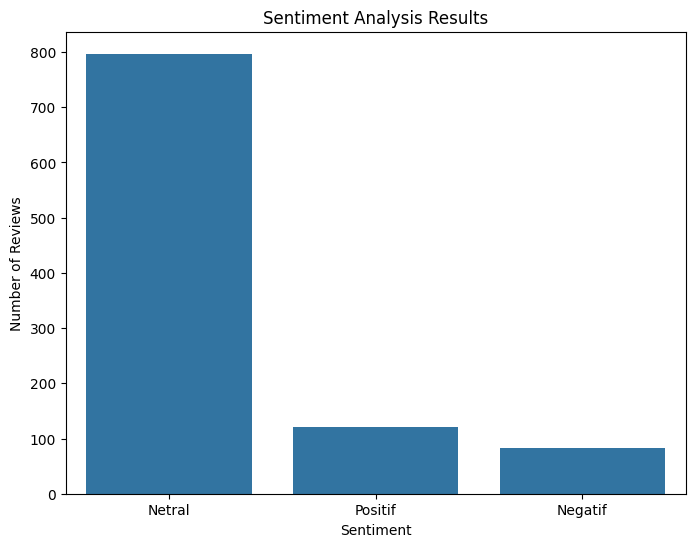

In [ ]:
# prompt: buatkan saya visualisasi nya barchard

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sentiment_counts' is already defined as in your provided code
# sentiment_counts = data_clean['textblob_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()